# Principal Component Analysis

## import library

In [169]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [170]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]
#print(feature)
print(x)
print(y)
number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

[3.38156 4.52788 2.65568 2.76523 2.84656 3.89067 3.47581 5.9113  3.92889
 4.56184 4.57407 4.37173 4.19169 5.24409 2.83584 5.63527 4.68633 2.85051
 5.11016 5.18256 5.70733 3.57968 5.63938 4.26347 2.53652 3.22383 4.92949
 5.79296 2.81685 3.88882 3.34323 5.87973 3.10392 5.33151 3.37543 4.77668
 2.67575 5.50028 1.7971  4.32251 4.421   3.1793  3.03354 4.60935 2.96379
 3.97176 1.18023 1.91895 3.95525 5.11795]
[3.38911 5.85418 4.41199 3.71541 4.17551 6.48838 3.63285 6.68077 5.09845
 5.6233  5.39765 5.46117 4.95469 4.66149 3.76802 6.31211 5.66524 4.62646
 7.3632  4.64651 6.68104 4.80278 6.12044 4.68943 3.88449 4.94256 5.95502
 5.10839 4.81896 5.10037 5.89301 5.52142 3.8571  4.68074 4.56538 6.25435
 3.73097 5.67948 3.24754 5.1111  6.02564 4.43686 3.97879 5.87979 3.30025
 5.40774 2.87869 5.07108 4.50533 6.08507]


## plot the input data

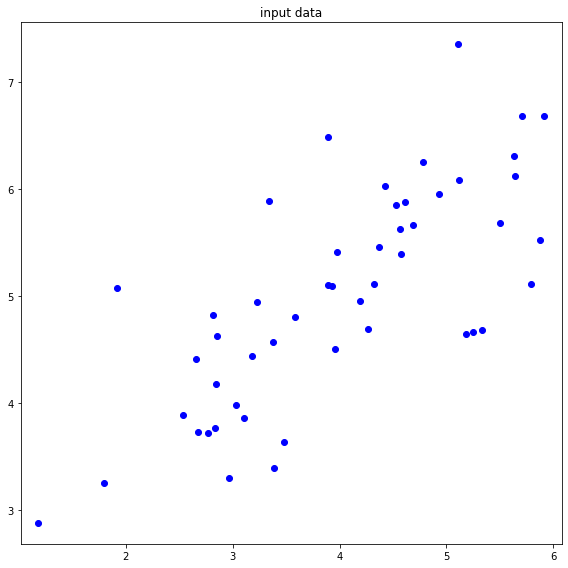

In [171]:
plt.figure(figsize=(8,8))   
plt.title('input data')


plt.scatter(x,y, c="b", marker="o")


plt.axis('equal')
plt.tight_layout()
plt.show()

## Normalization (Z-scoring)

mean of x =  3.989265199999999
mean of y =  5.002806
std of x =  1.161260585149156
std of y =  1.0131222834742113


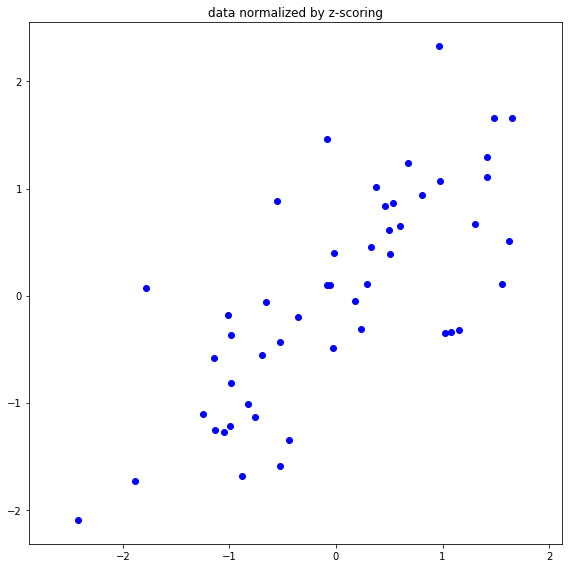

In [172]:
x_m , y_m = np.mean(feature,axis=0)
print('mean of x = ',x_m)
print('mean of y = ',y_m)
x_std, y_std = np.std(feature,axis=0)
print('std of x = ',x_std)
print('std of y = ',y_std)

x = (x-x_m)/x_std
y = (y-y_m)/y_std

n_feature = np.zeros((number_data,number_feature))
n_feature[:,0]=x
n_feature[:,1]=y

def plot_normalization_point(feature,x,y):
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')

    plt.scatter(x,y, c="b", marker="o")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    
    #return feature

plot_normalization_point(n_feature,x,y)

## compute covariance matrix

In [173]:
def compute_covariance(feature):
    
    Sigma = (1/number_data) * np.dot(feature.T,feature)
    
    return Sigma

## compute principal directions

In [174]:
def compute_eigen(X):
    
    S,U = np.linalg.eig(X)

    return S, U

In [175]:

Sigma = compute_covariance(n_feature)
#print(Sigma)
#print(np.cov(feature, rowvar = False))
#print()
S,U = compute_eigen(Sigma)
#print(S,U)

# 고유치가 큰 순서대로 S,U함수 정렬 -> first second principal axis 뽑기 위함.
idx = S.argsort()[::-1]
S=S[idx]
U = U[:,idx]
#print(S,U)

#print(U[:,np.argmax(S)])
#print(U[:,np.argmin(S)])

#first_eig_vec = U[:,np.argmax(S)]
#second_eig_vec = U[:,np.argmin(S)]
first_eig_vec = U[:,0]
second_eig_vec = U[:,1]

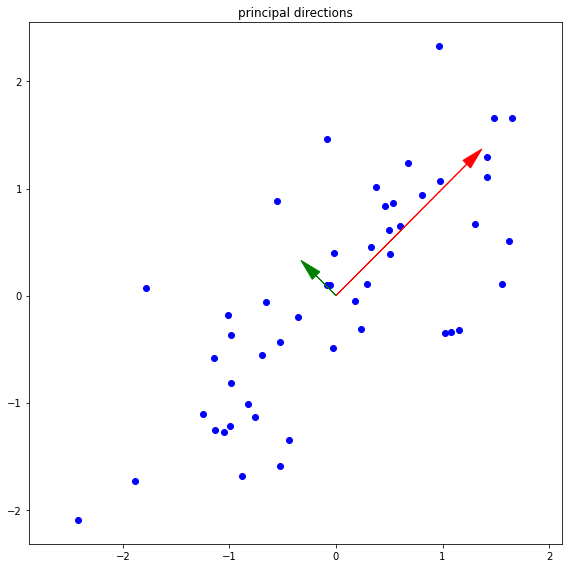

In [176]:
def principal_direction(feature):
    plt.figure(figsize=(8,8))
    plt.title('principal directions')

    plt.scatter(feature[:,0],feature[:,1], c="b", marker="o")
    
    plt.arrow(0, 0, S[0]*first_eig_vec[0], S[0]*first_eig_vec[1],  head_width = 0.1, head_length = 0.2,color = 'red')
    plt.arrow(0, 0, S[1]*second_eig_vec[0], S[1]*second_eig_vec[1],   head_width = 0.1, head_length = 0.2, color = 'green')

    plt.axis('equal')
    plt.tight_layout()
    plt.show()

principal_direction(n_feature)


## first principal axis

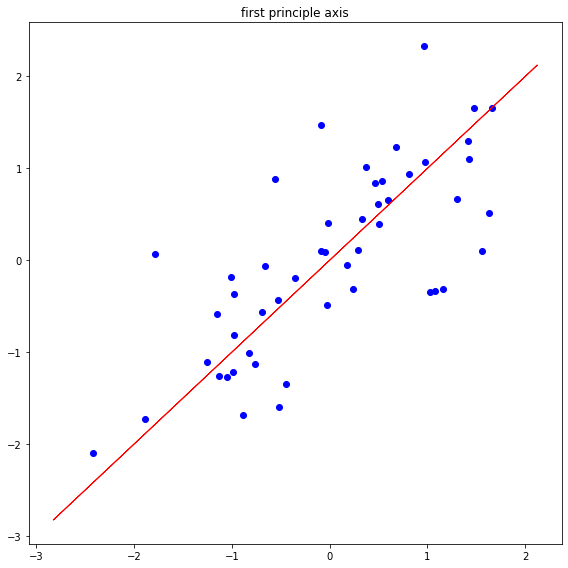

In [177]:
def first_principal_axis(feature):
    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    plt.scatter(feature[:,0],feature[:,1], c="b", marker="o")
    plt.arrow(-4*first_eig_vec[0],-4*first_eig_vec[1], 7*first_eig_vec[0], 7*first_eig_vec[1],  color = 'red')

    plt.tight_layout()
    plt.show()

first_principal_axis(n_feature)

## second principal axis

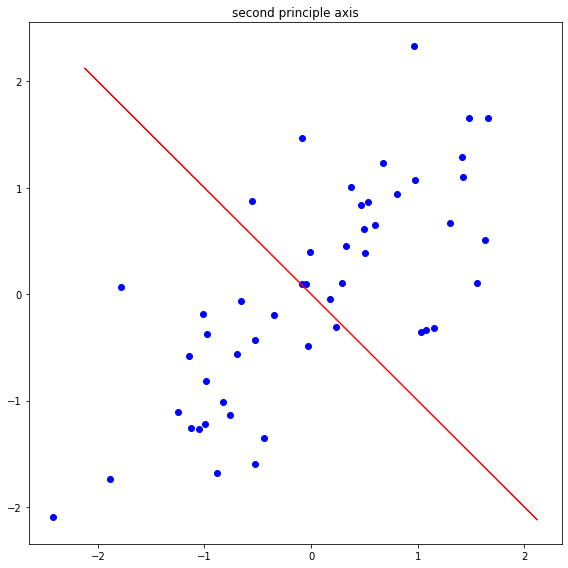

In [178]:
def second_principal_axis(feature):
    plt.figure(figsize=(8,8))
    plt.title('second principle axis')
    plt.scatter(feature[:,0],feature[:,1], c="b", marker="o")
    plt.arrow(-3*second_eig_vec[0],-3*second_eig_vec[1], 6*second_eig_vec[0], 6*second_eig_vec[1],  color = 'red')

    plt.tight_layout()
    plt.show()
    
second_principal_axis(n_feature)

## compute the projection of point onto the line

In [179]:
def compute_projection_onto_line(feature, vector):
    vector_norm2 = np.dot(vector.T,vector)
    
    projection = np.zeros((number_data,number_feature))
    for i in range(number_data):
        projection[i]=(np.dot(feature[i],vector)/vector_norm2)*vector

    
    return projection

## projcet to the first principal axis

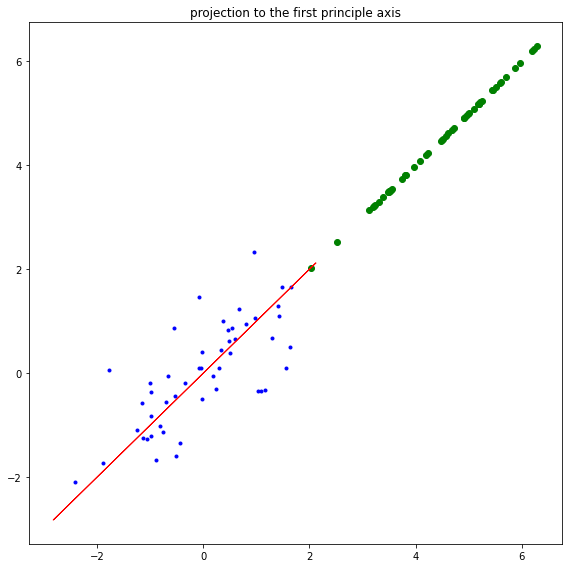

In [180]:
def projection_to_the_first_principal_axis(feature):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')

    projection_first_data = compute_projection_onto_line(feature,first_eig_vec)
    plt.scatter(x,y, c="b", marker=".")
    plt.arrow(-4*first_eig_vec[0],-4*first_eig_vec[1], 7*first_eig_vec[0], 7*first_eig_vec[1],  color = 'red')
    plt.scatter(projection_first_data[:,0],projection_first_data[:,1], c="g", marker="o")



    plt.tight_layout()
    plt.show()

projection_to_the_first_principal_axis(feature)

## projcet to the second principal axis

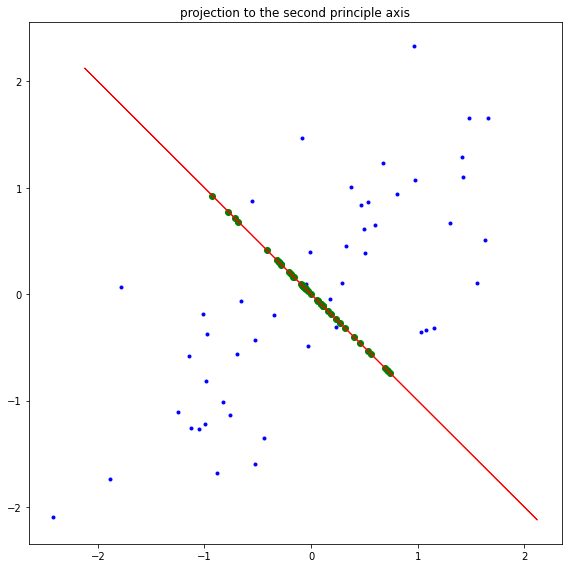

In [181]:
def projection_to_the_second_principal_axis(feature):
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    projection_second_data = compute_projection_onto_line(feature,second_eig_vec)

    plt.scatter(x,y, c="b", marker=".")
    plt.arrow(-3*second_eig_vec[0],-3*second_eig_vec[1], 6*second_eig_vec[0], 6*second_eig_vec[1],  color = 'red')
    plt.scatter(projection_second_data[:,0],projection_second_data[:,1], c="g", marker="o")


    plt.tight_layout()
    plt.show()
    
projection_to_the_second_principal_axis(n_feature)

## connect original data to the projection onto the first principal axis

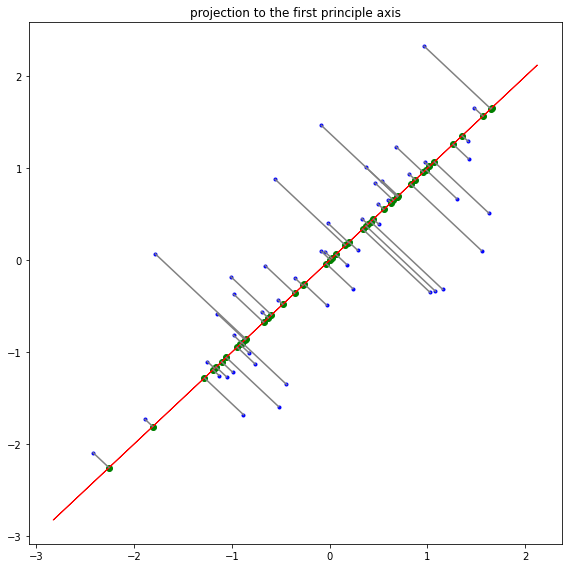

In [182]:
def connect_original_data_to_the_projection_onto_the_first_principal_axis(feature):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')

    projection_first_data = compute_projection_onto_line(feature,first_eig_vec)
    plt.scatter(x,y, c="b", marker=".")
    plt.arrow(-4*first_eig_vec[0],-4*first_eig_vec[1], 7*first_eig_vec[0], 7*first_eig_vec[1],  color = 'red')
    plt.scatter(projection_first_data[:,0],projection_first_data[:,1], c="g", marker="o")

    for i in range(number_data):
        plt.plot([feature[i,0],projection_first_data[i,0]],[feature[i,1],projection_first_data[i,1]],c = 'gray')


    plt.tight_layout()
    plt.show()

connect_original_data_to_the_projection_onto_the_first_principal_axis(n_feature)

## connect original data to the projection onto the second principal axis

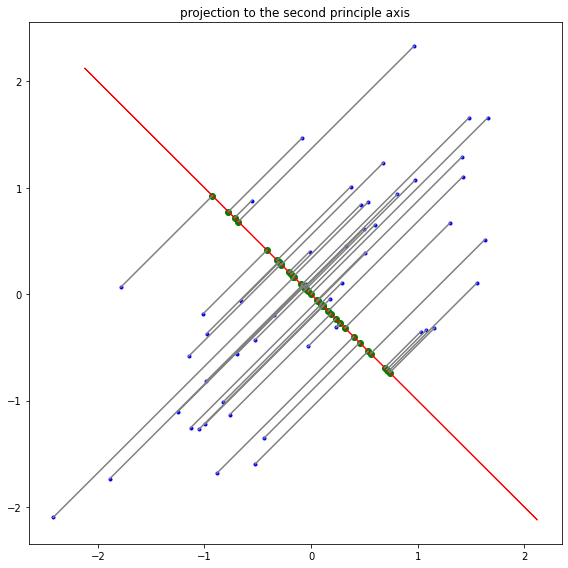

In [183]:
def connect_original_data_to_the_projection_onto_the_second_principal_axis(feature):

    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    projection_second_data = compute_projection_onto_line(feature,second_eig_vec)
    plt.scatter(x,y, c="b", marker=".")
    plt.arrow(-3*second_eig_vec[0],-3*second_eig_vec[1], 6*second_eig_vec[0], 6*second_eig_vec[1],  color = 'red')
    plt.scatter(projection_second_data[:,0],projection_second_data[:,1], c="g", marker="o")

    for i in range(number_data):
        plt.plot([feature[i,0],projection_second_data[i,0]],[feature[i,1],projection_second_data[i,1]],c = 'gray')


    plt.tight_layout()
    plt.show()
    
    
connect_original_data_to_the_projection_onto_the_second_principal_axis(n_feature)

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

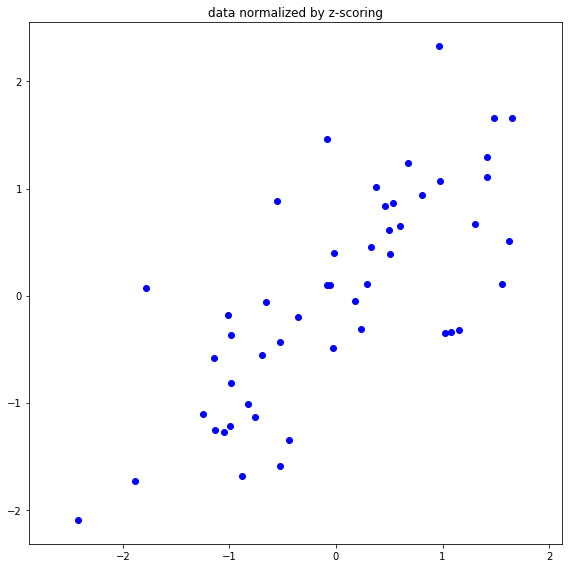

In [184]:
plot_normalization_point(n_feature,x,y)

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

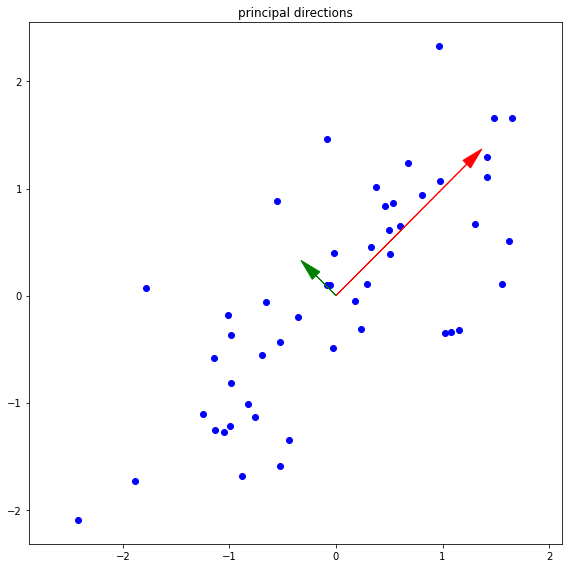

In [185]:
principal_direction(n_feature)

***

### 3. plot the first principal axis in red on the normalized data in blue

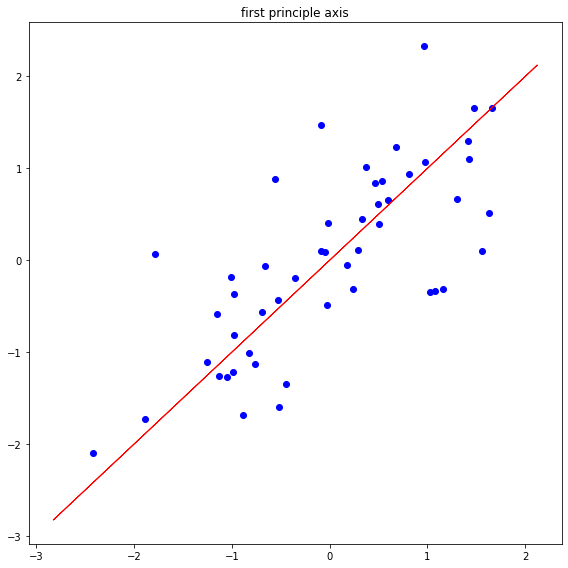

In [186]:
first_principal_axis(n_feature)

***

### 4. plot the second principal axis in red on the normalized data in blue

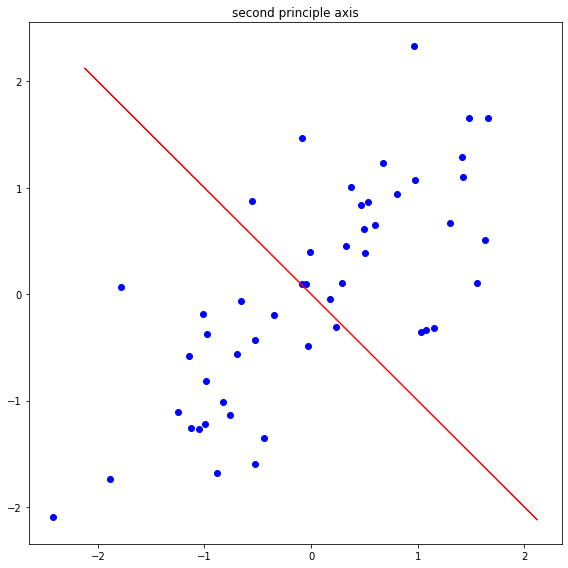

In [187]:
second_principal_axis(n_feature)

***

### 5. plot the projection of data in green onto the first principal axis in red

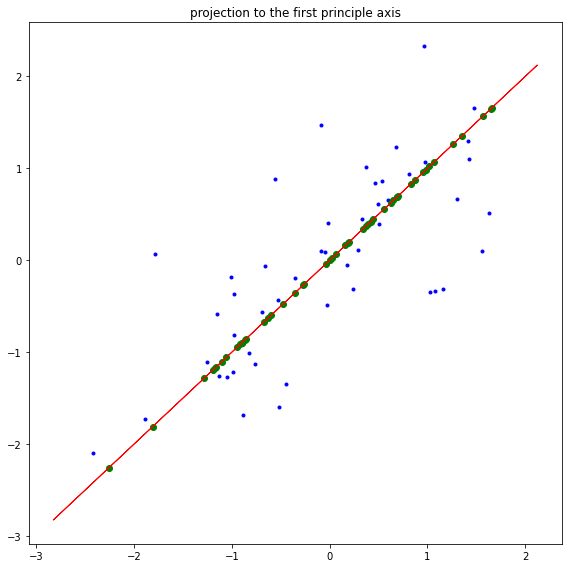

In [188]:
projection_to_the_first_principal_axis(n_feature)

***

### 6. plot the projection of data in green onto the second principal axis in red

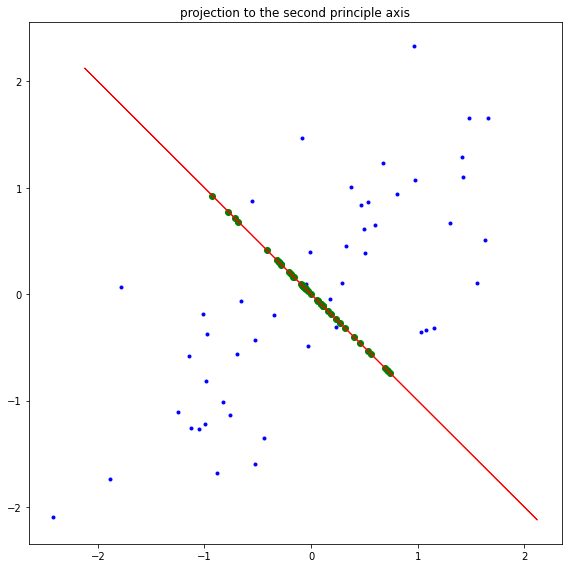

In [189]:
projection_to_the_second_principal_axis(n_feature)

***

### 7. plot the projection line in grey onto the first principal axis

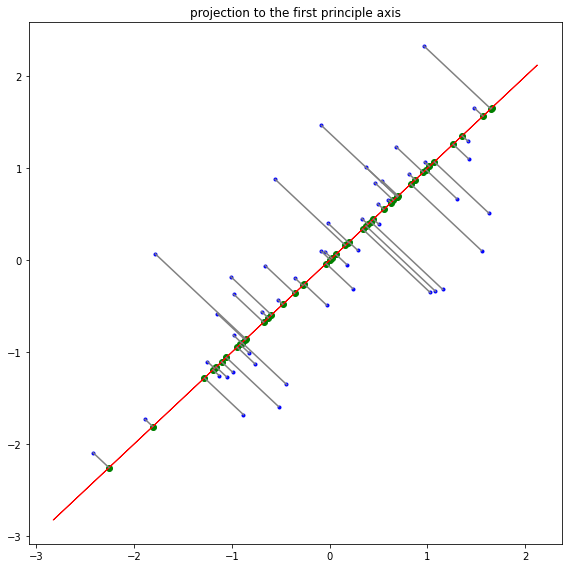

In [190]:
connect_original_data_to_the_projection_onto_the_first_principal_axis(n_feature)

***

### 8. plot the projection line in grey onto the second principal axis

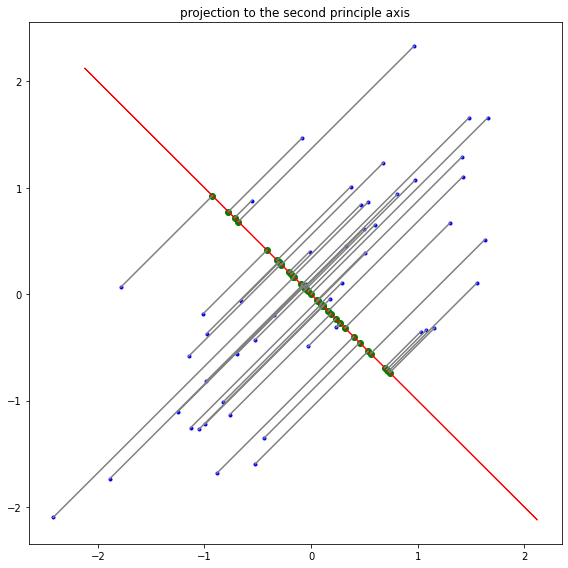

In [191]:
connect_original_data_to_the_projection_onto_the_second_principal_axis(n_feature)

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***